In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

class GradientBoostingRegressorScratch:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        # Initialize model with the mean of y
        self.initial_prediction = np.mean(y)
        current_prediction = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            # Compute residuals
            residuals = y - current_prediction

            # Fit a weak learner on residuals
            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X, residuals)
            self.models.append(model)

            # Update current prediction
            current_prediction += self.learning_rate * model.predict(X)

    def predict(self, X):
        # Start with initial prediction
        y_pred = np.full((X.shape[0],), self.initial_prediction)
        # Add contributions from each weak learner
        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)
        return y_pred

Mean Squared Error: 0.0155


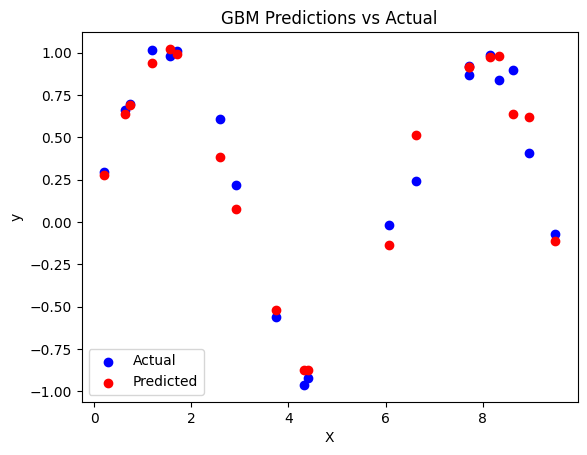

In [2]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train GBM model
gbm = GradientBoostingRegressorScratch(n_estimators=200, learning_rate=0.1, max_depth=3)
gbm.fit(X_train, y_train)

# Predict and evaluate
y_pred = gbm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Plot results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('GBM Predictions vs Actual')
plt.show()